In [1]:
from neuron import h
import matplotlib.pyplot as plt
import numpy as np

In [2]:
h.load_file('stdrun.hoc')

1.0

In [3]:
from enum import Enum

In [4]:
class NeuronDynamics(Enum):
    PAS = 'pas'
    HH = 'hh'

In [5]:
class PointSegment:

    def __init__(self, name, dynamics=NeuronDynamics.HH):
        self.segment = h.Section(name=name)
        self.segment.L = 20
        self.segment.diam = 20
        self.segment.insert(dynamics.value)
    
    def get_segment(self):
        return self.segment(0.5)

In [6]:
pre_neuron = PointSegment("pre_neuron")
post_dendrite = PointSegment("post_dendrite", dynamics=NeuronDynamics.PAS)

In [7]:
syn = h.ExpSyn(post_dendrite.get_segment())
syn.tau = 2

In [8]:
nc = h.NetCon(pre_neuron.get_segment()._ref_v, syn)
nc.threshold = -20
nc.weight[0] = 0.1
nc.delay = 1

In [9]:
iclamp = h.IClamp(pre_neuron.get_segment())

In [10]:
iclamp.delay = 5
iclamp.dur = 30
iclamp.amp = 0.5

In [11]:
t = h.Vector().record(h._ref_t)
v1 = h.Vector().record(pre_neuron.get_segment()._ref_v)
v2 = h.Vector().record(post_dendrite.get_segment()._ref_v)

In [12]:
iclamp_current = h.Vector().record(iclamp._ref_i)  # Current injected by IClamp

In [13]:
h.tstop = 100
h.v_init = -65
h.dt = 0.025

In [14]:
h.finitialize(h.v_init)
h.continuerun(h.tstop)

0.0

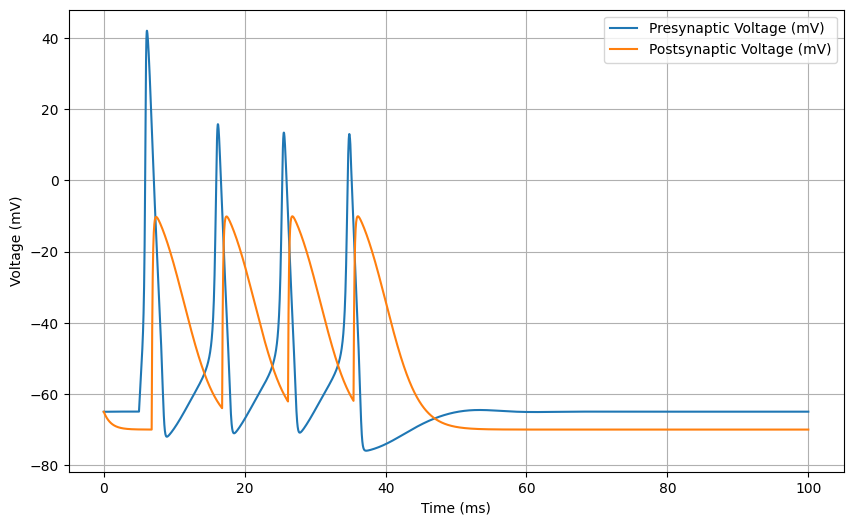

In [15]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, v1, label="Presynaptic Voltage (mV)")
plt.plot(t, v2, label="Postsynaptic Voltage (mV)")
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.grid(True)
plt.show()